%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

In [10]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

<h1 style="text-align:center">Diseñador de Difusores QRD</h1>

_En esta parte del repositorio se entrega un código capaz de calcular y entregar los parámetros de diseño necesarios para la construcción de un difusor QRD 2D._

### Elección de frecuencia de diseño y frecuencia máxima

Estos datos serán a elección del usuario interesado en diseñar un difusor y dependiendo del problema que quiera solucionar.

In [48]:
fo = int(input('ingrese la frecuencia de diseño para el difusor: '))
fmax = int(input('ingrese la frecuencia máxima de diseño para el difusor: '))
if fmax > 8*fo:                                                               #Condición de no superar tres octavas la frecuencia máxima respecto a la de diseño
    fmax = int(input('La frecuencia máxima no debe ser mayot a tres octavas de la frecuencia de diseño, ingrese otro valor: '))

ingrese la frecuencia de diseño para el difusor: 500
ingrese la frecuencia máxima de diseño para el difusor: 2000


### Determinación de la cantidad de cavidades del difusor

Se determinará el numero primo de cavidades según las indicaciones de la teoría, si se desea ingresar un manualmente el numero de cavidades solo se debe comentar la definicion de N e ingresar la deseada.

In [49]:
M = 2                 # Orden de difusión (usualmente se utiliza dos para mejorar la distribución de los lobulos, podría modificarse).
q = (2*fmax*M)/(fo)   # Determinación del número de cavidades.
N = int(q)            # Conversión de float a int.
#N = 7                # Posibilidad de ingresar numero de cavidades manualmente.

### Verificación del número primo

Como explica la teoría se debe tener una cantidad prima de cavidades, dado esto el siguiente código verificará esto y si N no es primo se elegirá el primo mayor más cercano a este.

In [50]:
if N==1 or N==2:                                        # Una condición para limitar el numero primo menor qeu se aceptará.
        print(str(N)+"esta configuración no es valida")
else:
    ind = 0                                             # Indicador para determinar si se encontró un número primo. 
    for j in range (N,2*N):                             # for que recorrera los numero enteros mayores al N encontrado anteriormente en caso de no ser un número primo.
        for i in range(2,N):                            # for que recorre desde 2 hasta N para verificar las condiciones de número primo. 
            if N%i==0:                                  # Condición donde se discrimina si es primo o no el número ingresado.
                print(str(N)+" no es primo")
                N = N+1
                break
            if N==i+1:                                  # Condición que se cumplirá al recorrer todo el número y verificar que es primo.
                print(str(N)+" es valido")
                ind = 1
                break
        if ind == 1:
            break
        

16 no es primo
17 es valido


### Condición frecuencia crítica

Para evitar problemas con la frecuencia crítica del difusor se verificará la condición que se debe cumplir entregada en la teoría.

In [51]:
if N <= (fmax/fo):            #Condición de frecuencia crítica
    print("Con esta elección de frecuencia de diseño y frecuencia máxima se generan problemas con la frecuencia crítica del difusor. Para solucionarlo se deben elegir otras frecuencias.") 
else:
    print("No existen problemas relacionados con la frecuencia crítica")

No existen problemas relacionados con la frecuencia crítica


### Determinación de las dimensiones del difusor

In [52]:
co = 344                            # Velocidad del sonido.
n = np.linspace(1,N,N)              # Vector de largo del numero primo N.
sn = (n**2)%N                       # Secuecnia de residuos cuadráticos que define las profundidades de las cavidades.
dn = (sn*co)/(2*N*fmax)             # Profundidad de las cavidades.
w = co/(2*fmax)                     # Ancho de las cavidades.
dn_cm= (dn*100)                     # Profundidad de las cavidades en centímetros.

### Presentación de los resultados

In [55]:
df = pd.DataFrame(columns = ['Cavidades','Profundidad [cm]','sn'])  # Creación de un DataFrame con títulos en las colúmnas.
df['Cavidades'] = np.linspace(1,N,N).astype(int)                    # Ingreso de la cantidad de cavidades para el indice del Data Frame.
df['Profundidad [cm]'] = np.round(dn_cm,2)                          # Ingreso de los valores de las profundidades de las cavidades en centímetros en el Data Frame.
df['sn'] = sn.astype(int)                                           # Ingreso de los valores de sn al Data Frame.
print("El ancho de las cavidades es de "+str(100*w)+" [cm] con una medida total del difusor de "+str(np.round(len(dn)*w,2))+" [m].")
df.set_index('Cavidades')                                           # Elección de la columna "Cavidades" en el índice vertical del Data Frame.


El ancho de las cavidades es de 8.6 [cm] con una medida total del difusor de 1.46 [m].


,Profundidad [cm],sn
Cavidades,,
1,0.51,1
2,2.02,4
3,4.55,9
4,8.09,16
5,4.05,8
6,1.01,2
7,7.59,15
8,6.58,13
9,6.58,13


En el siguiente grafico se ve la profundidad de cada una de las cavidades y sus proporciones, considerando una pequeña separación entre ellas. Permitiendo ver de color blanco, lo que sería el material del difusor y en azul sus cavidades.

<IPython.core.display.Javascript object>


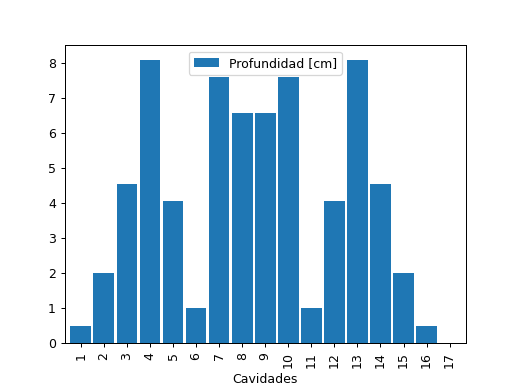

In [65]:
df.plot(x='Cavidades',y='Profundidad [cm]',kind = 'bar',width=0.9);